In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 6.5 MB/s 
     |████████████████████████████████| 1.2 MB 31.6 MB/s 
     |████████████████████████████████| 189 kB 43.3 MB/s 
     |████████████████████████████████| 48 kB 1.8 MB/s 
     |████████████████████████████████| 55 kB 1.0 MB/s 
     |████████████████████████████████| 558 kB 37.7 MB/s 
     |████████████████████████████████| 51 kB 289 kB/s 
     |████████████████████████████████| 130 kB 47.8 MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

# Under the Hood: Training a Digit Classifier

## Pixels: The Foundations of Computer Vision

## Sidebar: Tenacity and Deep Learning

## End sidebar

In [3]:
path = untar_data(URLs.MNIST)

In [4]:
#hide
Path.BASE_PATH = path

In [5]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [6]:
(path/'training').ls()

(#10) [Path('training/7'),Path('training/4'),Path('training/5'),Path('training/0'),Path('training/3'),Path('training/1'),Path('training/8'),Path('training/9'),Path('training/6'),Path('training/2')]

In [7]:
zeroes = (path/'training'/'0').ls().sorted()
ones = (path/'training'/'1').ls().sorted()
twos = (path/'training'/'2').ls().sorted()
threes = (path/'training'/'3').ls().sorted()
fours = (path/'training'/'4').ls().sorted()
fives = (path/'training'/'5').ls().sorted()
sixes = (path/'training'/'6').ls().sorted()
sevens = (path/'training'/'7').ls().sorted()
eights = (path/'training'/'8').ls().sorted()
nines = (path/'training'/'9').ls().sorted()

## First Try: Pixel Similarity

In [8]:
zero_tensors = [tensor(Image.open(o)) for o in zeroes]
one_tensors = [tensor(Image.open(o)) for o in ones]
two_tensors = [tensor(Image.open(o)) for o in twos]
three_tensors = [tensor(Image.open(o)) for o in threes]
four_tensors = [tensor(Image.open(o)) for o in fours]
five_tensors = [tensor(Image.open(o)) for o in fives]
six_tensors = [tensor(Image.open(o)) for o in sixes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
eight_tensors = [tensor(Image.open(o)) for o in eights]
nine_tensors = [tensor(Image.open(o)) for o in nines]
len(zero_tensors),len(one_tensors),len(two_tensors),len(three_tensors),len(four_tensors),len(five_tensors),len(six_tensors),len(seven_tensors),len(eight_tensors),len(nine_tensors)

(5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949)

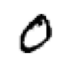

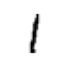

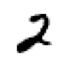

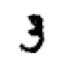

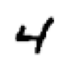

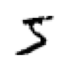

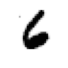

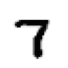

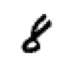

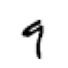

In [9]:
show_image(zero_tensors[0]);
show_image(one_tensors[0]);
show_image(two_tensors[0]);
show_image(three_tensors[0]);
show_image(four_tensors[0]);
show_image(five_tensors[0]);
show_image(six_tensors[0]);
show_image(seven_tensors[0]);
show_image(eight_tensors[0]);
show_image(nine_tensors[0]);

In [10]:
stacked_zeroes = torch.stack(zero_tensors).float()/255
stacked_ones = torch.stack(one_tensors).float()/255
stacked_twos = torch.stack(two_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_fours = torch.stack(four_tensors).float()/255
stacked_fives = torch.stack(five_tensors).float()/255
stacked_sixes = torch.stack(six_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_eights = torch.stack(eight_tensors).float()/255
stacked_nines = torch.stack(nine_tensors).float()/255

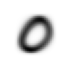

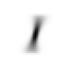

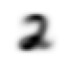

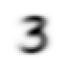

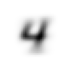

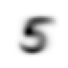

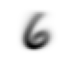

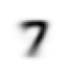

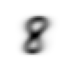

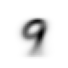

In [11]:
mean0 = stacked_zeroes.mean(0)
mean1 = stacked_ones.mean(0)
mean2 = stacked_twos.mean(0)
mean3 = stacked_threes.mean(0)
mean4 = stacked_fours.mean(0)
mean5 = stacked_fives.mean(0)
mean6 = stacked_sixes.mean(0)
mean7 = stacked_sevens.mean(0)
mean8 = stacked_eights.mean(0)
mean9 = stacked_nines.mean(0)

show_image(mean0);
show_image(mean1);
show_image(mean2);
show_image(mean3);
show_image(mean4);
show_image(mean5);
show_image(mean6);
show_image(mean7);
show_image(mean8);
show_image(mean9);

## Computing Metrics Using Broadcasting

In [12]:
ones_valid = (path/'testing'/'1').ls().sorted()
ones_valid

(#1135) [Path('testing/1/1004.png'),Path('testing/1/1008.png'),Path('testing/1/1011.png'),Path('testing/1/1019.png'),Path('testing/1/1025.png'),Path('testing/1/1027.png'),Path('testing/1/1030.png'),Path('testing/1/1037.png'),Path('testing/1/1038.png'),Path('testing/1/1040.png')...]

In [13]:
#Zeroes
valid_0_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'0').ls()])
valid_0_tens = valid_0_tens.float()/255

#Ones
valid_1_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'1').ls()])
valid_1_tens = valid_1_tens.float()/255

#Twos
valid_2_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'2').ls()])
valid_2_tens = valid_2_tens.float()/255

#Threes
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

#Fours
valid_4_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'4').ls()])
valid_4_tens = valid_4_tens.float()/255

#Fives
valid_5_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'5').ls()])
valid_5_tens = valid_5_tens.float()/255

#Sixes
valid_6_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'6').ls()])
valid_6_tens = valid_6_tens.float()/255

#Sevens
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

#Eights
valid_8_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'8').ls()])
valid_8_tens = valid_8_tens.float()/255

#Nines
valid_9_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'9').ls()])
valid_9_tens = valid_9_tens.float()/255
#valid_3_tens.shape,valid_7_tens.shape

In [14]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
#mnist_distance(a_3, mean3)

In [15]:
valid_9_dist = mnist_distance(valid_9_tens, mean9)
valid_9_dist, valid_9_dist.shape

(tensor([0.1017, 0.0989, 0.0971,  ..., 0.1053, 0.1157, 0.1049]),
 torch.Size([1009]))

In [16]:
# add means to dictionary
dict_means = {}
dict_means[0] = mean0
dict_means[1] = mean1
dict_means[2] = mean2
dict_means[3] = mean3
dict_means[4] = mean4
dict_means[5] = mean5
dict_means[6] = mean6
dict_means[7] = mean7
dict_means[8] = mean8
dict_means[9] = mean9

In [17]:
#return all matching keys as a set
def find_key(input_dict, value):
    return {k for k, v in input_dict.items() if v == value}

In [18]:
# x is tensor image, dict_means is dictionary of mean tensor images
def match_digit(x, dict_means): 
  a = {}
  for i in range(10):
    a[i] = float(mnist_distance(x,dict_means[i]))
    
  return min(a, key=a.get)

In [19]:
a_0 = stacked_zeroes[0]
match_digit(a_0, dict_means)

0

In [20]:
#Zeroes
valid_0_tens_testing = [match_digit(o, dict_means) for o in valid_0_tens]
counter0=collections.Counter(valid_0_tens_testing)
print("Validation Zeroes: ", counter0)

#Ones
valid_1_tens_testing = [match_digit(o, dict_means) for o in valid_1_tens]
counter1=collections.Counter(valid_1_tens_testing)
print("Validation Ones: ", counter1)

#Twos
valid_2_tens_testing = [match_digit(o, dict_means) for o in valid_2_tens]
counter2=collections.Counter(valid_2_tens_testing)
print("Validation Twos: ", counter2)

#Threes
valid_3_tens_testing = [match_digit(o, dict_means) for o in valid_3_tens]
counter3=collections.Counter(valid_3_tens_testing)
print("Validation Threes: ", counter3)

#Fours
valid_4_tens_testing = [match_digit(o, dict_means) for o in valid_4_tens]
counter4=collections.Counter(valid_4_tens_testing)
print("Validation Fours: ", counter4)

#Fives
valid_5_tens_testing = [match_digit(o, dict_means) for o in valid_5_tens]
counter5=collections.Counter(valid_5_tens_testing)
print("Validation Fives: ", counter5)

#Sixes
valid_6_tens_testing = [match_digit(o, dict_means) for o in valid_6_tens]
counter6=collections.Counter(valid_6_tens_testing)
print("Validation Sixes: ", counter6)

#Sevens
valid_7_tens_testing = [match_digit(o, dict_means) for o in valid_7_tens]
counter7=collections.Counter(valid_7_tens_testing)
print("Validation Sevens: ", counter7)

#Eights
valid_8_tens_testing = [match_digit(o, dict_means) for o in valid_8_tens]
counter8=collections.Counter(valid_8_tens_testing)
print("Validation Eights: ", counter8)

#Nines
valid_9_tens_testing = [match_digit(o, dict_means) for o in valid_9_tens]
counter9=collections.Counter(valid_9_tens_testing)
print("Validation Nines: ", counter9)

Validation Zeroes:  Counter({0: 799, 1: 54, 6: 49, 5: 26, 9: 20, 3: 10, 8: 10, 7: 9, 4: 3})
Validation Ones:  Counter({1: 1133, 6: 1, 3: 1})
Validation Twos:  Counter({1: 446, 2: 437, 8: 26, 7: 24, 3: 24, 4: 24, 6: 23, 0: 17, 9: 11})
Validation Threes:  Counter({3: 615, 1: 320, 9: 27, 8: 18, 7: 15, 5: 5, 2: 5, 6: 3, 4: 1, 0: 1})
Validation Fours:  Counter({4: 656, 1: 165, 9: 149, 6: 11, 7: 1})
Validation Fives:  Counter({1: 325, 5: 291, 3: 145, 9: 59, 7: 23, 6: 21, 4: 19, 0: 6, 8: 3})
Validation Sixes:  Counter({6: 754, 1: 148, 4: 37, 0: 9, 5: 5, 2: 4, 9: 1})
Validation Sevens:  Counter({7: 786, 1: 199, 9: 31, 4: 7, 2: 2, 8: 2, 0: 1})
Validation Eights:  Counter({8: 431, 1: 371, 9: 68, 3: 51, 7: 15, 0: 11, 6: 11, 4: 9, 5: 7})
Validation Nines:  Counter({9: 783, 1: 117, 4: 41, 7: 41, 0: 9, 3: 7, 8: 5, 6: 4, 5: 1, 2: 1})


In [21]:
accuracy_0s = counter0[0]/sum(counter0.values())
accuracy_1s = counter1[1]/sum(counter1.values())
accuracy_2s = counter2[2]/sum(counter2.values())
accuracy_3s = counter3[3]/sum(counter3.values())
accuracy_4s = counter4[4]/sum(counter4.values())
accuracy_5s = counter5[5]/sum(counter5.values())
accuracy_6s = counter6[6]/sum(counter6.values())
accuracy_7s = counter7[7]/sum(counter7.values())
accuracy_8s = counter8[8]/sum(counter8.values())
accuracy_9s = counter9[9]/sum(counter9.values())

print(
    '\nZeroes Accuracy: {:.1f}%'.format(accuracy_0s*100),
    '\nOnes Accuracy: {:.1f}%'.format(accuracy_1s*100),
    '\nTwos Accuracy: {:.1f}%'.format(accuracy_2s*100),
    '\nThrees Accuracy: {:.1f}%'.format(accuracy_3s*100),
    '\nFours Accuracy: {:.1f}%'.format(accuracy_4s*100),
    '\nFives Accuracy: {:.1f}%'.format(accuracy_5s*100),
    '\nSixes Accuracy: {:.1f}%'.format(accuracy_6s*100),
    '\nSevens Accuracy: {:.1f}%'.format(accuracy_7s*100),
    '\nEights Accuracy: {:.1f}%'.format(accuracy_8s*100),
    '\nNines Accuracy: {:.1f}%'.format(accuracy_9s*100)
)


Zeroes Accuracy: 81.5% 
Ones Accuracy: 99.8% 
Twos Accuracy: 42.3% 
Threes Accuracy: 60.9% 
Fours Accuracy: 66.8% 
Fives Accuracy: 32.6% 
Sixes Accuracy: 78.7% 
Sevens Accuracy: 76.5% 
Eights Accuracy: 44.3% 
Nines Accuracy: 77.6%


In [22]:
# set up x values in list
x_vals = [i for i in range(10)]

# set up y values in list
y_vals = [accuracy_0s*100,
          accuracy_1s*100,
          accuracy_2s*100,
          accuracy_3s*100,
          accuracy_4s*100,
          accuracy_5s*100,
          accuracy_6s*100,
          accuracy_7s*100,
          accuracy_8s*100,
          accuracy_9s*100,
          ]

<BarContainer object of 10 artists>

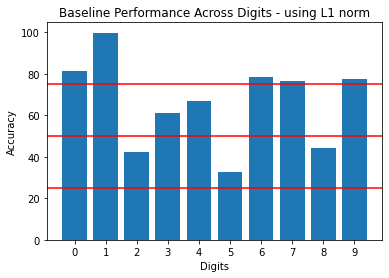

In [23]:
# plot results for visual inspection
plt.title("Baseline Performance Across Digits - using L1 norm")
plt.xticks(range(0,10))
plt.xlabel('Digits')
plt.ylabel('Accuracy')
# plot quartile % lines
plt.axhline(25,color='red')
plt.axhline(50,color='red')
plt.axhline(75,color='red')
plt.bar(
    x_vals, 
    y_vals)

## Stochastic Gradient Descent (SGD)

## The MNIST Loss Function

In [24]:
train_x = torch.cat(
    [stacked_zeroes, stacked_ones, stacked_twos, 
     stacked_threes, stacked_fours, stacked_fives, 
     stacked_sixes, stacked_sevens, stacked_eights, 
     stacked_nines]
     ).view(-1, 28*28)

In [25]:
train_x.shape

torch.Size([60000, 784])

In [26]:
train_counts = {}
train_counts[0] = len(zeroes)
train_counts[1] = len(ones)
train_counts[2] = len(twos)
train_counts[3] = len(threes)
train_counts[4] = len(fours)
train_counts[5] = len(fives)
train_counts[6] = len(sixes)
train_counts[7] = len(sevens)
train_counts[8] = len(eights)
train_counts[9] = len(nines)

In [27]:
# format train_y to 1x10 vector where digit match = 1, all else 0 as target labels
train_y = torch.from_numpy(np.concatenate([[[0]*i + [1] + [0]*(9-i)]*train_counts[i] for i in range(10)]))

In [28]:
train_x.shape,train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 10]))

In [29]:
valid_counts = {}
valid_counts[0] = len(valid_0_tens)
valid_counts[1] = len(valid_1_tens)
valid_counts[2] = len(valid_2_tens)
valid_counts[3] = len(valid_3_tens)
valid_counts[4] = len(valid_4_tens)
valid_counts[5] = len(valid_5_tens)
valid_counts[6] = len(valid_6_tens)
valid_counts[7] = len(valid_7_tens)
valid_counts[8] = len(valid_8_tens)
valid_counts[9] = len(valid_9_tens)

In [30]:
valid_x = torch.cat(
    [valid_0_tens, valid_1_tens, valid_2_tens, valid_3_tens, 
     valid_4_tens, valid_5_tens, valid_6_tens, 
     valid_7_tens, valid_8_tens, valid_9_tens]
     ).view(-1, 28*28)

In [31]:
# format valid_y to 1x10 vector where digit match = 1, all else 0 as target labels
valid_y = torch.from_numpy(np.concatenate([[[0]*i + [1] + [0]*(9-i)]*valid_counts[i] for i in range(10)]))

In [32]:
train_dset = list(zip(train_x,train_y))
valid_dset = list(zip(valid_x,valid_y))

x,y = train_dset[0]
x.shape,y

(torch.Size([784]), tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [33]:
x_valid,y_valid = valid_dset[0]
x_valid.shape,y_valid

(torch.Size([784]), tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [34]:
def init_params(sizeD1, sizeD2=0): 
  if sizeD2 == 0:
    return (torch.randn(sizeD1)).requires_grad_()
  else:
    return (torch.randn(sizeD1, sizeD2)).requires_grad_()

In [35]:
weights = init_params((28*28,10))
bias = init_params(10)

In [36]:
weights.shape, bias.shape

(torch.Size([784, 10]), torch.Size([10]))

In [37]:
# linear equation
def linear_eq(x):
    return x@weights + bias

In [38]:
preds = linear_eq(train_x)
preds

tensor([[-11.9867,  -4.2706,   4.6806,  ...,  -1.3517,  -0.0395,  13.5840],
        [ -6.6797,  -4.4483,   1.4827,  ...,  -8.9409,   2.2570,  10.0881],
        [-22.7994,   2.2295,  11.1160,  ...,  -1.8488,  25.5523,  22.3240],
        ...,
        [-16.7386,   4.0141,   3.9273,  ...,   1.5960,   9.7961,  12.3801],
        [-14.1562,  -3.5679,   1.7541,  ...,   1.6506,  16.5308,  10.3213],
        [-11.3688,   4.5965,   5.7170,  ...,  10.0353,   4.4967,   9.5438]], grad_fn=<AddBackward0>)

In [39]:
#get predicted digits
pred_indices = preds.argmax(1)

In [40]:
#get target labels from one hot encoded tensor
train_target_indices = train_y.argmax(1)

In [41]:
accuracy_check = pred_indices == train_target_indices
accuracy_check.float().mean()

tensor(0.1204)

In [42]:
def loss_function(predictions, targets):
  sm = nn.Softmax(dim=-1) # instantiate PyTorch's softmax in the 2nd dimension
  predictions = sm(predictions) # calculate the softmax across the 2nd dimension
  return torch.where(targets==1, 1-predictions, predictions).mean(-1)

In [43]:
loss_function(preds, train_y)

tensor([0.2000, 0.2000, 0.2000,  ..., 0.0141, 0.1996, 0.1299], grad_fn=<MeanBackward1>)

## Mini Batches

In [44]:
dl = DataLoader(train_dset, batch_size=128, shuffle=True)
valid_dl = DataLoader(valid_dset, batch_size=128, shuffle=True)

In [45]:
print(len(dl))

469


In [46]:
print(len(valid_dl))

79


## MNIST Model

In [47]:
class MNISTLinearRegression:
  def __init__(self, train_dl, valid_dl, epochs, lr, verbose):
    self.lr = lr
    self.train_dl = train_dl
    self.valid_dl = valid_dl
    self.epochs = epochs
    self.weights, self.bias = self._init_params()
    self.softmax = nn.Softmax(dim=-1)
    self.accuracy_scores = []
    self.verbose = verbose

  def train(self):
    for i in range(self.epochs):
      for xb, yb in self.train_dl:
        self._calc_grad(xb, yb)
        for p in [self.weights, self.bias]:
            p.data -= p.grad*self.lr
            p.grad.zero_()

      self._validate_epoch(i)

  def predict(self, image_tensor):
    probabilities = self.softmax(self._linear_eq(image_tensor))
    _, prediction = probabilities.max(-1)
    # Return digit and vector of probabilities
    return prediction, probabilities

  def _calc_grad(self, xb, yb):
    preds = self._linear_eq(xb)
    loss = self._loss_function(preds, yb)
    loss.mean().backward()

  def _batch_accuracy(self, xb, yb):
    predictions = self.softmax(xb) 
    _, max_indices = xb.max(-1) # get the index of max value along 2nd dimension
    _, tag_indices = yb.max(-1) # get index of flag in our label tensors
    corrects = max_indices == tag_indices # check whether they match
    return corrects.float().mean() # calculate mean

  def _validate_epoch(self, i):
    accs = [self._batch_accuracy(self._linear_eq(xb), yb) for xb,yb in self.valid_dl]
    score = round(torch.stack(accs).mean().item(), 4)
    self.accuracy_scores.append(score)
    self._print(f'Epoch #{i}', score)

  def _linear_eq(self, x):
    return x@self.weights + self.bias

  def _loss_function(self, predictions, targets):
    predictions = self.softmax(predictions)
    return torch.where(targets==1, 1-predictions, predictions).mean(-1)

  def _print(self, *args):
    if self.verbose:
      print(*args)

  # Linear regression using SGD
  def _init_params(*args):
    return (torch.randn(28*28, 10)).requires_grad_(), (torch.randn(10)).requires_grad_()

In [48]:
model = MNISTLinearRegression(dl, valid_dl, 50, 1, True)

In [49]:
model.train()

Epoch #0 0.2523
Epoch #1 0.342
Epoch #2 0.3824
Epoch #3 0.4138
Epoch #4 0.4377
Epoch #5 0.4674
Epoch #6 0.4958
Epoch #7 0.5186
Epoch #8 0.5388
Epoch #9 0.554
Epoch #10 0.5663
Epoch #11 0.5702
Epoch #12 0.5827
Epoch #13 0.6204
Epoch #14 0.6376
Epoch #15 0.6491
Epoch #16 0.6592
Epoch #17 0.6626
Epoch #18 0.67
Epoch #19 0.6733
Epoch #20 0.6758
Epoch #21 0.6798
Epoch #22 0.6824
Epoch #23 0.6866
Epoch #24 0.6875
Epoch #25 0.6909
Epoch #26 0.6931
Epoch #27 0.6928
Epoch #28 0.6942
Epoch #29 0.6946
Epoch #30 0.6948
Epoch #31 0.6975
Epoch #32 0.6962
Epoch #33 0.7021
Epoch #34 0.7009
Epoch #35 0.7015
Epoch #36 0.7001
Epoch #37 0.705
Epoch #38 0.7059
Epoch #39 0.7079
Epoch #40 0.7063
Epoch #41 0.7059
Epoch #42 0.7037
Epoch #43 0.7089
Epoch #44 0.7111
Epoch #45 0.7101
Epoch #46 0.7102
Epoch #47 0.7108
Epoch #48 0.7117
Epoch #49 0.713
